<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Urban-electric-aircraft-ML-optimization/blob/main/Wing_ac_Simulated%20annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Maximum Sweep Angle: 12.0
Optimal Minimum Sweep Length: 268.3
Optimal Maximum Cruise Attack Angle: 6.0
Optimal Maximum Magnitude: 4042.81


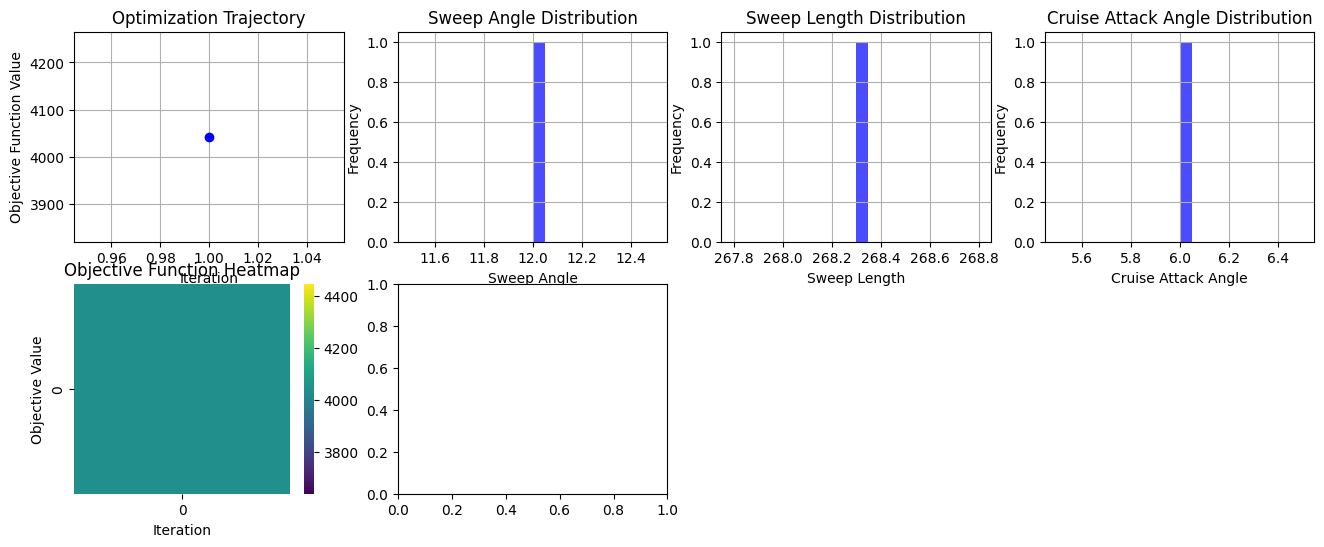

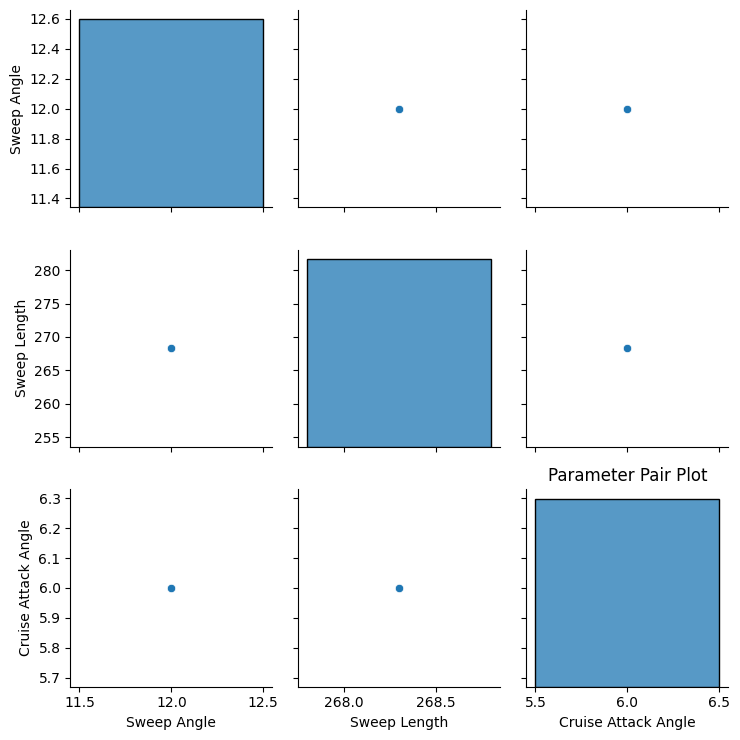

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from a CSV file (replace 'your_new_dataset.csv' with your file)
filepath = r'/content/Wing set 1 data - Copy.xlsx'
data = pd.read_excel(filepath)

# Define the objective function to maximize Magnitude
def objective(x):
    sweep_angle, sweep_length, cruise_attack_angle = x
    # Calculate Magnitude based on your dataset (replace this with your calculation)
    filtered_data = data[(data['Sweep angle'] <= sweep_angle) & (data['Sweep length'] >= sweep_length) & (data['Cruise attack angle'] <= cruise_attack_angle)]
    magnitude = filtered_data['Magnitude'].max()
    return magnitude

# Define constraints
max_sweep_angle = 16.0  # Set your optimal maximum Sweep angle constraint
max_cruise_attack_angle = 6.0  # Set your optimal maximum Cruise attack angle constraint
min_sweep_length = 262.8  # Set your optimal minimum Sweep length constraint

constraints = ({'type': 'ineq', 'fun': lambda x: max_sweep_angle - x[0]},
               {'type': 'ineq', 'fun': lambda x: max_cruise_attack_angle - x[2]},
               {'type': 'ineq', 'fun': lambda x: x[1] - min_sweep_length})

# Randomly select initial guess from the dataset
initial_guess = data.sample(1).values[0][0:3]  # Assuming the first 3 columns are Sweep, Length, Cruise

# Lists to store optimization history
x_history = []
y_history = []

# Define a custom callback function to record optimization history
def record_history(x):
    x_history.append(x)
    y_history.append(objective(x))

# Run the simulated annealing optimization
result = minimize(objective, initial_guess, constraints=constraints, method='SLSQP', callback=record_history)

# Extract the results
optimal_max_sweep_angle = result.x[0]
optimal_min_sweep_length = result.x[1]
optimal_max_cruise_attack_angle = result.x[2]
optimal_max_magnitude = result.fun

# Print the results
print("Optimal Maximum Sweep Angle:", optimal_max_sweep_angle)
print("Optimal Minimum Sweep Length:", optimal_min_sweep_length)
print("Optimal Maximum Cruise Attack Angle:", optimal_max_cruise_attack_angle)
print("Optimal Maximum Magnitude:", optimal_max_magnitude)

# Visualize the optimization process
plt.figure(figsize=(16, 6))

# Plot 1: Optimization trajectory
plt.subplot(2, 4, 1)
plt.plot(range(1, len(y_history) + 1), y_history, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Optimization Trajectory")
plt.grid()

# Plot 2: Histogram of Sweep Angle
plt.subplot(2, 4, 2)
plt.hist([x[0] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Sweep Angle")
plt.ylabel("Frequency")
plt.title("Sweep Angle Distribution")
plt.grid()

# Plot 3: Histogram of Sweep Length
plt.subplot(2, 4, 3)
plt.hist([x[1] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Sweep Length")
plt.ylabel("Frequency")
plt.title("Sweep Length Distribution")
plt.grid()

# Plot 4: Histogram of Cruise Attack Angle
plt.subplot(2, 4, 4)
plt.hist([x[2] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Cruise Attack Angle")
plt.ylabel("Frequency")
plt.title("Cruise Attack Angle Distribution")
plt.grid()

# Plot 5: Heatmap of the objective function values
plt.subplot(2, 4, 5)
sns.heatmap(np.array(y_history).reshape(-1, 1), cmap='viridis', annot=False)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Objective Function Heatmap")

# Plot 6: Pair plot of parameter combinations
param_df = pd.DataFrame(x_history, columns=['Sweep Angle', 'Sweep Length', 'Cruise Attack Angle'])
plt.subplot(2, 4, 6)
sns.pairplot(param_df)
plt.title("Parameter Pair Plot")

plt.tight_layout()
plt.show()
